(<Figure size 800x600 with 1 Axes>, <Axes: >)

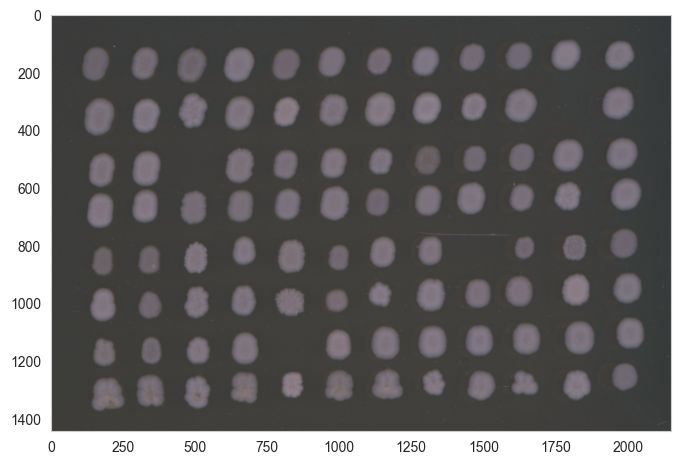

In [1]:
import phenotypic as pht

plate_image = pht.GridImage(pht.data.load_plate_72hr())
plate_image.show()

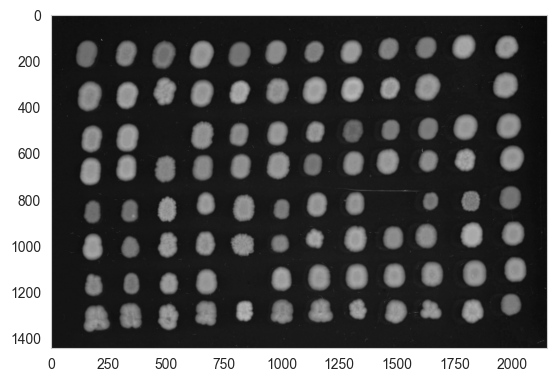

In [2]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(rgb2gray(plate_image.array[:]), cmap='gray')

(<Figure size 800x600 with 1 Axes>, <Axes: >)

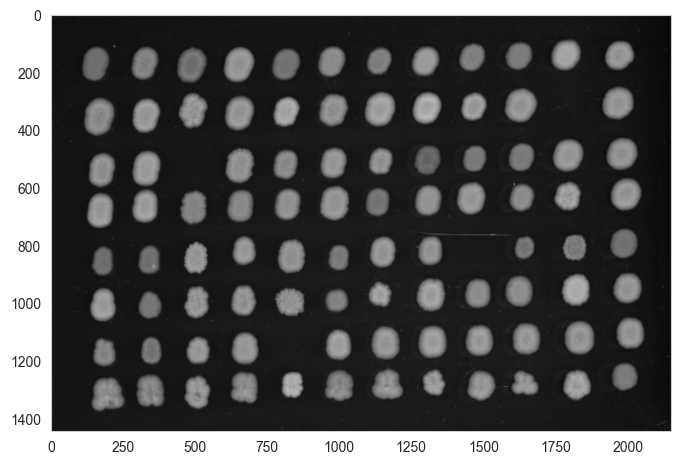

In [3]:
plate_image.matrix.show()

(<Figure size 1000x500 with 2 Axes>,
 array([ (<Figure size 1000x500 with 2 Axes>, <Axes: title={'center': 'ff3dea7e-ce6a-4dc4-a493-db7d70176b61'}>),
        <Axes: >], dtype=object))

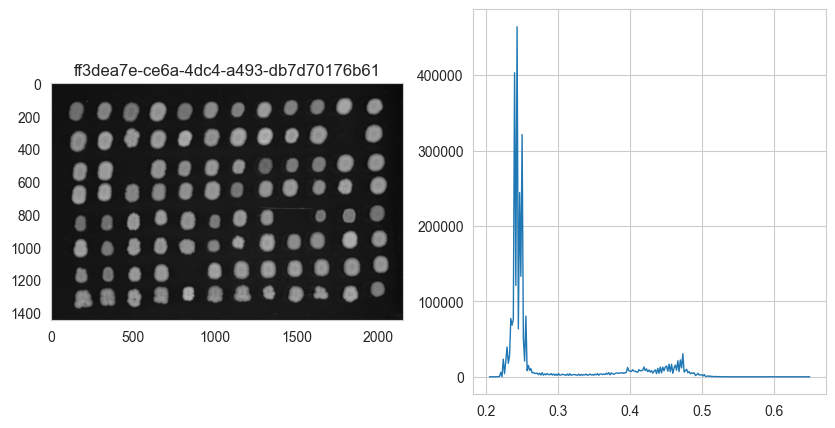

In [4]:
plate_image.enh_matrix.histogram()

(<Figure size 900x1000 with 1 Axes>, <Axes: >)

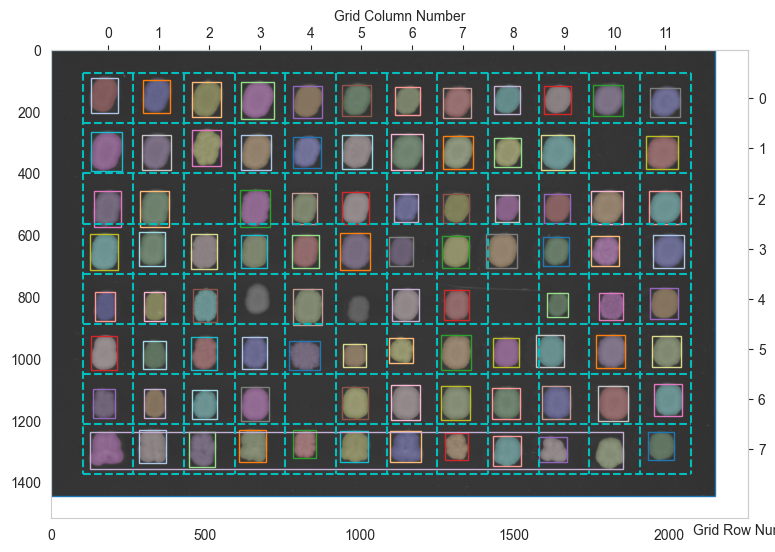

In [5]:
from phenotypic import ImagePipeline
from phenotypic.enhancement import CLAHE, GaussianSmoother, MedianEnhancer, ContrastStretching
from phenotypic.detection import WatershedDetector
from phenotypic.correction import GridAligner
from phenotypic.grid import GridApply, MinResidualErrorReducer, GridAlignmentOutlierRemover
from phenotypic.objedit import BorderObjectRemover, SmallObjectRemover, LowCircularityRemover
from phenotypic.objedit import MaskFill

from phenotypic.measure import MeasureColor, MeasureShape, MeasureIntensity, MeasureTexture

kmarx_pipeline = ImagePipeline(
        ops={
            'blur'                            : GaussianSmoother(sigma=5),
            'clahe'                           : CLAHE(),
            'median filter'                   : MedianEnhancer(),
            'detection'                       : WatershedDetector(footprint='auto', min_size=50, relabel=True),
            'mask_fill'                       : MaskFill(),
            'RemoveBorderObjects'             : BorderObjectRemover(),
            'low circularity remover'         : LowCircularityRemover(0.7),
            'reduce by section residual error': MinResidualErrorReducer(),
            'outlier removal'                 : GridAlignmentOutlierRemover(),
            'align'                           : GridAligner(),
            'grid_reduction'                  : MinResidualErrorReducer(),
        },
        meas={
            'MeasureColor'    : MeasureColor(),
            'MeasureShape'    : MeasureShape(),
            'MeasureIntensity': MeasureIntensity(),
            'MeasureTexture'  : MeasureTexture(scale=3),
            'MeasureTexture2' : MeasureTexture(scale=4),
        }
)

pipeline_output = kmarx_pipeline.apply(plate_image)
pipeline_output.objects.relabel()
pipeline_output.show_overlay()


(<Figure size 1000x500 with 2 Axes>,
 array([ (<Figure size 1000x500 with 2 Axes>, <Axes: title={'center': '050baabb-3ed7-4dea-84a9-4b8d4cd9091e'}>),
        <Axes: >], dtype=object))

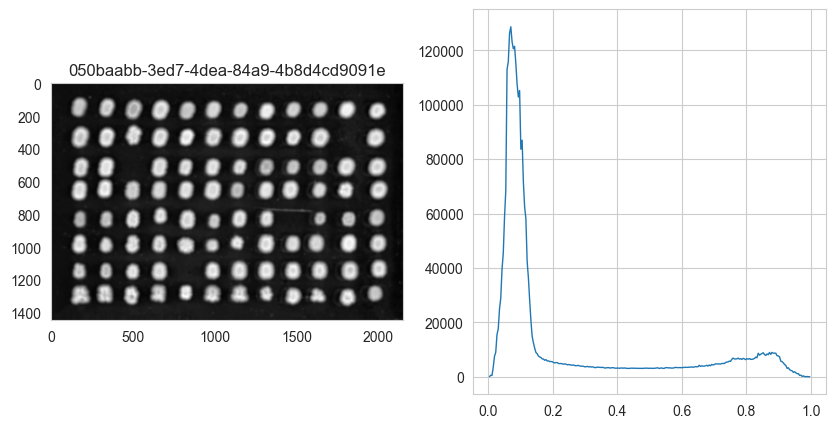

In [6]:
pipeline_output.enh_matrix.histogram()

In [7]:
pipeline_meas = kmarx_pipeline.measure(pipeline_output, include_metadata=False)
pipeline_meas

,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,...,TextureGray_DiffEntropy-deg090-scale04,TextureGray_DiffEntropy-deg135-scale04,TextureGray_InfoCorrelation1-deg000-scale04,TextureGray_InfoCorrelation1-deg045-scale04,TextureGray_InfoCorrelation1-deg090-scale04,TextureGray_InfoCorrelation1-deg135-scale04,TextureGray_InfoCorrelation2-deg000-scale04,TextureGray_InfoCorrelation2-deg045-scale04,TextureGray_InfoCorrelation2-deg090-scale04,TextureGray_InfoCorrelation2-deg135-scale04
0,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,1,146.389728,171.025220,92,129,204,...,2.212139,2.631305,-0.253830,-0.178170,-0.272094,-0.182094,0.902013,0.828720,0.915982,0.835632
1,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,2,149.320484,340.361316,96,297,204,...,2.915488,3.284991,-0.219830,-0.146581,-0.230499,-0.159711,0.918623,0.839933,0.927088,0.859669
2,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,3,160.806829,503.310931,104,457,218,...,2.669144,2.973104,-0.237575,-0.150767,-0.250875,-0.177081,0.923610,0.836560,0.932165,0.870964
3,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,4,163.592914,667.372290,105,616,223,...,2.989333,3.380286,-0.289470,-0.205936,-0.293260,-0.217196,0.958627,0.910453,0.960324,0.919707
4,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,5,162.582913,988.458851,112,944,214,...,2.887862,3.346623,-0.287260,-0.198125,-0.266577,-0.197161,0.951200,0.892787,0.942511,0.893279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,86,1293.564356,489.112486,1238,447,1349,...,3.303701,3.828687,-0.217686,-0.146826,-0.217621,-0.144416,0.934184,0.865576,0.934993,0.861769
86,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,87,1283.914791,1311.578175,1240,1275,1327,...,3.617821,4.040765,-0.215614,-0.151869,-0.211240,-0.141325,0.937822,0.878942,0.935548,0.864344
87,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,88,1298.131035,1475.668566,1249,1431,1348,...,3.101031,3.482445,-0.283656,-0.197911,-0.268494,-0.201851,0.966296,0.920439,0.961065,0.923790
88,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,89,1296.695274,1624.837045,1252,1581,1335,...,3.548074,3.988802,-0.256770,-0.182465,-0.237860,-0.184976,0.960420,0.913779,0.951880,0.915413


(<Figure size 800x600 with 1 Axes>, <Axes: >)

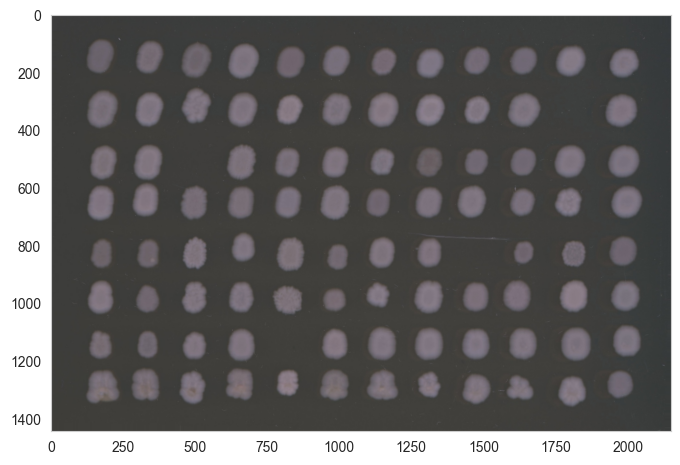

In [8]:
pipeline_output.array.show()

min: 0.18000000715255737 max: 0.7300000190734863


<Axes: ylabel='Count'>

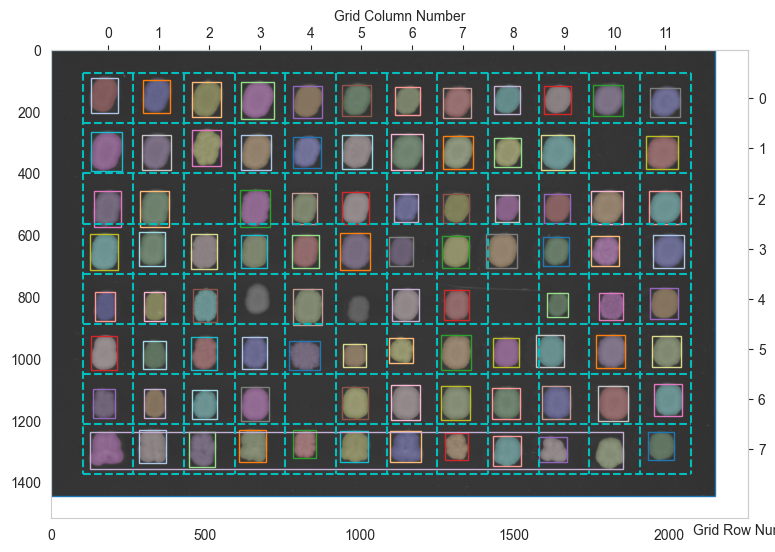

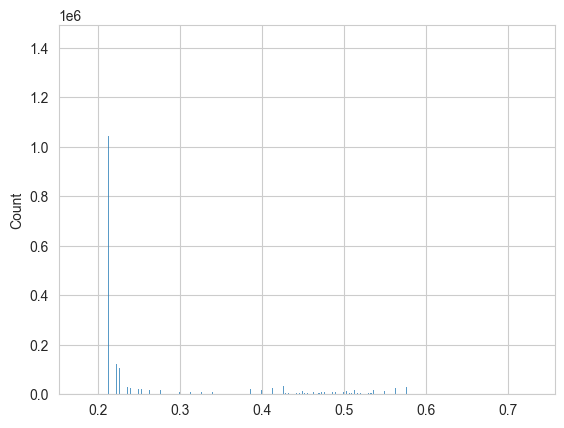

In [9]:
fig, ax = pipeline_output.show_overlay()
overlay_arr = ax.images[0].get_array()

import seaborn as sns
import matplotlib.pyplot as plt

hist_fig, hist_ax = plt.subplots()
print(f'min: {overlay_arr.min()} max: {overlay_arr.max()}')
sns.histplot(overlay_arr.ravel(), ax=hist_ax)

In [10]:
CLAHE.__name__

'CLAHE'

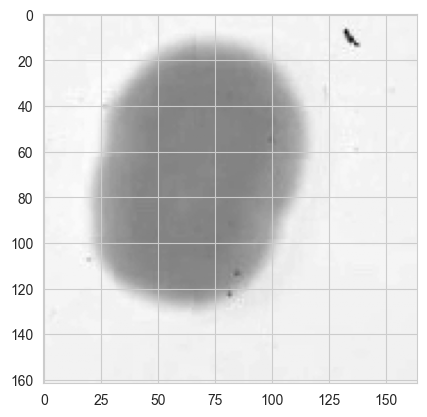

In [11]:
colony_image = pipeline_output.grid[0]
from skimage.util import invert

colony_matrix = invert(colony_image.matrix[:])

import matplotlib.pyplot as plt

plt.imshow(colony_matrix, cmap='gray')

(<Figure size 800x600 with 1 Axes>, <Axes: >)

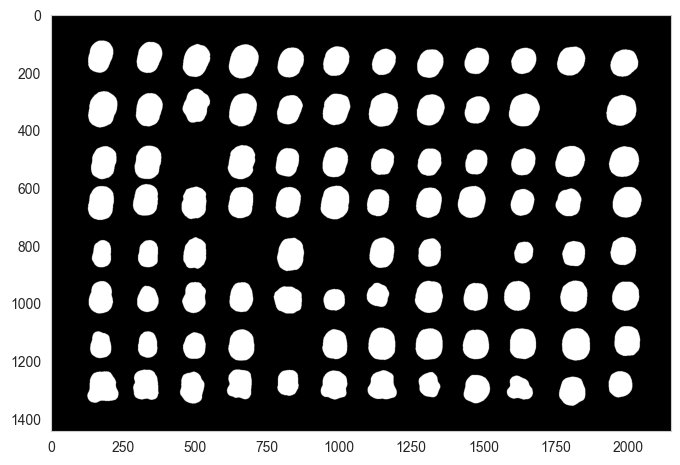

In [12]:
pipeline_output.objmask.show()

In [13]:
pipeline_output.grid.info()

,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_RowInterval,Grid_ColNum,Grid_ColInterval,Grid_SectionIndex,Grid_SectionNum
0,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,1,146.389728,171.025220,92,129,204,216,0,"(76, 238)",0,"(103, 267)","(0, 0)",0
1,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,2,149.320484,340.361316,96,297,204,386,0,"(76, 238)",1,"(267, 431)","(0, 1)",1
2,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,3,160.806829,503.310931,104,457,218,552,0,"(76, 238)",2,"(431, 595)","(0, 2)",2
3,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,4,163.592914,667.372290,105,616,223,721,0,"(76, 238)",3,"(595, 759)","(0, 3)",3
4,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,5,162.582913,988.458851,112,944,214,1035,0,"(76, 238)",5,"(923, 1087)","(0, 5)",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,86,1293.564356,489.112486,1238,447,1349,532,7,"(1211, 1373)",2,"(431, 595)","(7, 2)",86
86,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,87,1283.914791,1311.578175,1240,1275,1327,1350,7,"(1211, 1373)",7,"(1251, 1415)","(7, 7)",91
87,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,88,1298.131035,1475.668566,1249,1431,1348,1523,7,"(1211, 1373)",8,"(1415, 1579)","(7, 8)",92
88,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,89,1296.695274,1624.837045,1252,1581,1335,1671,7,"(1211, 1373)",9,"(1579, 1743)","(7, 9)",93


In [14]:
shape_measurements = MeasureShape().measure(pipeline_output)
shape_measurements

,ObjectLabel,Shape_Area,Shape_Perimeter,Shape_Circularity,Shape_ConvexArea,Shape_MedianRadius,Shape_MeanRadius,Shape_Eccentricity,Shape_Solidity,Shape_Extent,Shape_BboxArea,Shape_MajorAxisLength,Shape_MinorAxisLength,Shape_Compactness,Shape_Orientation
0,1,7613.0,335.563492,0.849603,316.517210,14.000000,15.658120,0.697679,24.052405,0.781301,9744.0,116.511637,83.470191,1.177020,-0.295205
1,2,7445.0,330.149278,0.858329,311.469473,14.000000,15.638814,0.667029,23.902824,0.774553,9612.0,112.947968,84.149837,1.165054,-0.340896
2,3,8288.0,348.291414,0.858567,328.237068,14.764823,16.526457,0.650268,25.250043,0.765282,10830.0,117.988329,89.636289,1.164732,-0.378287
3,4,9455.0,369.362482,0.870895,348.749593,16.000000,17.861013,0.605939,27.111143,0.763115,12390.0,123.119680,97.943036,1.148244,-0.405697
4,5,7327.0,322.492424,0.885313,306.337331,14.000000,15.824517,0.593671,23.918077,0.789377,9282.0,107.748365,86.705934,1.129544,-0.433380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,7272.0,331.320851,0.832465,311.484939,13.601471,15.143153,0.670905,23.346233,0.770747,9435.0,112.079039,83.111471,1.201251,0.022526
86,87,4976.0,269.036580,0.863908,255.293855,11.401754,12.770168,0.568069,19.491264,0.762605,6525.0,88.076298,72.485089,1.157530,0.207409
87,88,7021.0,317.078210,0.877558,300.026625,13.892444,15.540999,0.450041,23.401256,0.770861,9108.0,100.315608,89.582614,1.139525,-0.340076
88,89,5523.0,293.764502,0.804241,275.439489,11.401754,12.701294,0.498848,20.051591,0.739357,7470.0,91.865102,79.618503,1.243408,0.993205


In [15]:
intensity_measurements = MeasureIntensity().measure(pipeline_output)
intensity_measurements

,ObjectLabel,Intensity_IntegratedIntensity,Intensity_MinimumIntensity,Intensity_MaximumIntensity,Intensity_MeanIntensity,Intensity_MedianIntensity,Intensity_StandardDeviationIntensity,Intensity_CoefficientVarianceIntensity,Intensity_LowerQuartileIntensity,Intensity_UpperQuartileIntensity,Intensity_InterquartileRangeIntensity
0,1,2934.342480,0.316240,0.447028,0.385438,0.394091,0.017599,0.045667,0.376455,0.398012,0.021557
1,2,3083.069399,0.308397,0.450094,0.414113,0.424592,0.028401,0.068592,0.399969,0.434407,0.034438
2,3,3275.913597,0.324084,0.435546,0.395260,0.398831,0.021214,0.053677,0.385384,0.412017,0.026633
3,4,4200.433309,0.310369,0.483713,0.444255,0.458502,0.035761,0.080506,0.428522,0.470267,0.041745
4,5,3104.175486,0.308129,0.457401,0.423663,0.441715,0.033624,0.079375,0.406146,0.448993,0.042847
...,...,...,...,...,...,...,...,...,...,...,...
85,86,3203.665308,0.307258,0.499667,0.440548,0.452914,0.035968,0.081655,0.418438,0.469687,0.051248
86,87,2213.270136,0.297168,0.508597,0.444789,0.458502,0.041352,0.092988,0.421480,0.476123,0.054643
87,88,3096.548284,0.332462,0.497153,0.441041,0.454015,0.036513,0.082801,0.415938,0.469955,0.054016
88,89,2374.248611,0.284838,0.489875,0.429884,0.444826,0.042370,0.098579,0.402224,0.465244,0.063020


In [16]:
texture_measurements = MeasureTexture().measure(pipeline_output)
texture_measurements

,ObjectLabel,TextureGray_AngularSecondMoment-deg000-scale05,TextureGray_AngularSecondMoment-deg045-scale05,TextureGray_AngularSecondMoment-deg090-scale05,TextureGray_AngularSecondMoment-deg135-scale05,TextureGray_Contrast-deg000-scale05,TextureGray_Contrast-deg045-scale05,TextureGray_Contrast-deg090-scale05,TextureGray_Contrast-deg135-scale05,TextureGray_Correlation-deg000-scale05,...,TextureGray_DiffEntropy-deg090-scale05,TextureGray_DiffEntropy-deg135-scale05,TextureGray_InfoCorrelation1-deg000-scale05,TextureGray_InfoCorrelation1-deg045-scale05,TextureGray_InfoCorrelation1-deg090-scale05,TextureGray_InfoCorrelation1-deg135-scale05,TextureGray_InfoCorrelation2-deg000-scale05,TextureGray_InfoCorrelation2-deg045-scale05,TextureGray_InfoCorrelation2-deg090-scale05,TextureGray_InfoCorrelation2-deg135-scale05
0,1,0.052742,0.049521,0.055917,0.051424,8.809807,12.631186,7.190609,11.154855,0.690255,...,2.322959,2.778526,-0.215145,-0.143700,-0.236057,-0.141204,0.869293,0.776539,0.890367,0.775322
1,2,0.010398,0.008930,0.010594,0.009442,23.021292,39.232544,17.383429,28.775519,0.712900,...,3.116612,3.484455,-0.176566,-0.108580,-0.183909,-0.119214,0.879002,0.769525,0.888365,0.793792
2,3,0.013390,0.011464,0.015207,0.013006,12.590568,22.085794,10.940453,17.251809,0.730449,...,2.882082,3.180152,-0.185367,-0.100763,-0.198810,-0.128191,0.879720,0.741215,0.893606,0.799934
3,4,0.015581,0.012389,0.017340,0.013991,26.803384,44.973751,25.248294,39.350017,0.786575,...,3.169979,3.572464,-0.244581,-0.163897,-0.249429,-0.171978,0.937294,0.866778,0.940486,0.877254
4,5,0.023624,0.021141,0.024384,0.021901,25.232654,44.630835,24.975116,36.329489,0.771768,...,3.048101,3.519363,-0.253474,-0.157940,-0.226745,-0.158965,0.933897,0.845726,0.918100,0.849048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0.004941,0.004315,0.005093,0.004177,37.003424,55.184819,31.755987,59.466861,0.719210,...,3.522381,4.045190,-0.174063,-0.107134,-0.170846,-0.107610,0.897835,0.795924,0.895775,0.796274
86,87,0.003761,0.003306,0.003719,0.003137,50.589738,76.804348,48.550315,82.282614,0.703702,...,3.828696,4.243473,-0.173630,-0.116756,-0.169549,-0.105550,0.903437,0.822922,0.900142,0.799580
87,88,0.005594,0.004734,0.005972,0.004900,23.824349,39.766477,22.904617,37.198429,0.831569,...,3.306937,3.692586,-0.245370,-0.160609,-0.225270,-0.156937,0.950497,0.883342,0.939924,0.879482
88,89,0.004450,0.003706,0.004353,0.004026,37.121812,62.305804,46.198303,76.336840,0.803007,...,3.763867,4.202088,-0.215670,-0.147283,-0.196398,-0.146796,0.939143,0.874337,0.925673,0.872937


,ObjectLabel,Color_CieXMin,Color_CieXQ1,Color_CieXMean,Color_CieXMedian,Color_CieXQ3,Color_CieXMax,Color_CieXStdDev,Color_CieXCoefficientVariance,Color_CieYMin,...,Color_BrightnessMin,Color_BrightnessQ1,Color_BrightnessMean,Color_BrightnessMedian,Color_BrightnessQ3,Color_BrightnessMax,Color_BrightnessStdDev,Color_BrightnessCoefficientVariance,Color_ChromaEstimatedMean,Color_ChromaEstimatedMedian
0,1,0.303554,0.366656,0.375491,0.382287,0.389729,0.433750,0.018216,0.048518,0.316242,...,0.325490,0.400000,0.410452,0.415686,0.427451,0.466667,0.021569,0.052555,3.894873,3.840626
1,2,0.296099,0.389424,0.404264,0.415834,0.425108,0.440018,0.029161,0.072143,0.308399,...,0.317647,0.427451,0.441378,0.454902,0.462745,0.478431,0.031422,0.071200,4.003527,4.304368
2,3,0.311009,0.374111,0.384786,0.389729,0.400911,0.423276,0.021566,0.056054,0.324085,...,0.333333,0.407843,0.418420,0.423529,0.435294,0.458824,0.024022,0.057419,3.551586,3.638739
3,4,0.295884,0.416932,0.433294,0.448888,0.460071,0.474994,0.036638,0.084565,0.310370,...,0.317647,0.458824,0.475722,0.494118,0.501961,0.525490,0.039894,0.083869,4.329448,4.683871
4,5,0.295683,0.394567,0.413009,0.430744,0.438199,0.447069,0.034246,0.082931,0.308132,...,0.321569,0.435294,0.455029,0.474510,0.482353,0.498039,0.039710,0.087280,4.246466,4.652391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0.297931,0.408366,0.429597,0.441433,0.458149,0.490105,0.036442,0.084841,0.307262,...,0.321569,0.450980,0.472609,0.486275,0.501961,0.533333,0.039996,0.084639,3.909795,4.190730
86,87,0.285320,0.410198,0.434069,0.448687,0.466325,0.498873,0.042067,0.096932,0.297169,...,0.309804,0.450980,0.477002,0.494118,0.513725,0.552941,0.046900,0.098342,4.131587,4.307149
87,88,0.318867,0.404638,0.430181,0.443745,0.458870,0.485871,0.036919,0.085834,0.332464,...,0.345098,0.443137,0.470141,0.486275,0.501961,0.533333,0.040408,0.085961,3.964263,4.190644
88,89,0.272722,0.389899,0.418060,0.432563,0.454206,0.478708,0.043011,0.102902,0.284838,...,0.298039,0.427451,0.458315,0.478431,0.498039,0.533333,0.048283,0.105368,3.690803,3.792199


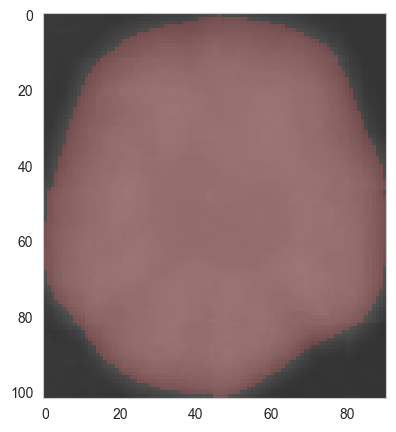

In [17]:
single_object = pipeline_output.objects[-1]
fig, ax = single_object.show_overlay()
color_measurements = MeasureColor().measure(pipeline_output)
color_measurements

In [18]:
color_measurements

,ObjectLabel,Color_CieXMin,Color_CieXQ1,Color_CieXMean,Color_CieXMedian,Color_CieXQ3,Color_CieXMax,Color_CieXStdDev,Color_CieXCoefficientVariance,Color_CieYMin,...,Color_BrightnessMin,Color_BrightnessQ1,Color_BrightnessMean,Color_BrightnessMedian,Color_BrightnessQ3,Color_BrightnessMax,Color_BrightnessStdDev,Color_BrightnessCoefficientVariance,Color_ChromaEstimatedMean,Color_ChromaEstimatedMedian
0,1,0.303554,0.366656,0.375491,0.382287,0.389729,0.433750,0.018216,0.048518,0.316242,...,0.325490,0.400000,0.410452,0.415686,0.427451,0.466667,0.021569,0.052555,3.894873,3.840626
1,2,0.296099,0.389424,0.404264,0.415834,0.425108,0.440018,0.029161,0.072143,0.308399,...,0.317647,0.427451,0.441378,0.454902,0.462745,0.478431,0.031422,0.071200,4.003527,4.304368
2,3,0.311009,0.374111,0.384786,0.389729,0.400911,0.423276,0.021566,0.056054,0.324085,...,0.333333,0.407843,0.418420,0.423529,0.435294,0.458824,0.024022,0.057419,3.551586,3.638739
3,4,0.295884,0.416932,0.433294,0.448888,0.460071,0.474994,0.036638,0.084565,0.310370,...,0.317647,0.458824,0.475722,0.494118,0.501961,0.525490,0.039894,0.083869,4.329448,4.683871
4,5,0.295683,0.394567,0.413009,0.430744,0.438199,0.447069,0.034246,0.082931,0.308132,...,0.321569,0.435294,0.455029,0.474510,0.482353,0.498039,0.039710,0.087280,4.246466,4.652391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0.297931,0.408366,0.429597,0.441433,0.458149,0.490105,0.036442,0.084841,0.307262,...,0.321569,0.450980,0.472609,0.486275,0.501961,0.533333,0.039996,0.084639,3.909795,4.190730
86,87,0.285320,0.410198,0.434069,0.448687,0.466325,0.498873,0.042067,0.096932,0.297169,...,0.309804,0.450980,0.477002,0.494118,0.513725,0.552941,0.046900,0.098342,4.131587,4.307149
87,88,0.318867,0.404638,0.430181,0.443745,0.458870,0.485871,0.036919,0.085834,0.332464,...,0.345098,0.443137,0.470141,0.486275,0.501961,0.533333,0.040408,0.085961,3.964263,4.190644
88,89,0.272722,0.389899,0.418060,0.432563,0.454206,0.478708,0.043011,0.102902,0.284838,...,0.298039,0.427451,0.458315,0.478431,0.498039,0.533333,0.048283,0.105368,3.690803,3.792199


In [19]:
pipeline_measurements = kmarx_pipeline.measure(pipeline_output, include_metadata=False)

In [20]:
pipeline_measurements

,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,...,TextureGray_DiffEntropy-deg090-scale04,TextureGray_DiffEntropy-deg135-scale04,TextureGray_InfoCorrelation1-deg000-scale04,TextureGray_InfoCorrelation1-deg045-scale04,TextureGray_InfoCorrelation1-deg090-scale04,TextureGray_InfoCorrelation1-deg135-scale04,TextureGray_InfoCorrelation2-deg000-scale04,TextureGray_InfoCorrelation2-deg045-scale04,TextureGray_InfoCorrelation2-deg090-scale04,TextureGray_InfoCorrelation2-deg135-scale04
0,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,1,146.389728,171.025220,92,129,204,...,2.212139,2.631305,-0.253830,-0.178170,-0.272094,-0.182094,0.902013,0.828720,0.915982,0.835632
1,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,2,149.320484,340.361316,96,297,204,...,2.915488,3.284991,-0.219830,-0.146581,-0.230499,-0.159711,0.918623,0.839933,0.927088,0.859669
2,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,3,160.806829,503.310931,104,457,218,...,2.669144,2.973104,-0.237575,-0.150767,-0.250875,-0.177081,0.923610,0.836560,0.932165,0.870964
3,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,4,163.592914,667.372290,105,616,223,...,2.989333,3.380286,-0.289470,-0.205936,-0.293260,-0.217196,0.958627,0.910453,0.960324,0.919707
4,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,5,162.582913,988.458851,112,944,214,...,2.887862,3.346623,-0.287260,-0.198125,-0.266577,-0.197161,0.951200,0.892787,0.942511,0.893279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,86,1293.564356,489.112486,1238,447,1349,...,3.303701,3.828687,-0.217686,-0.146826,-0.217621,-0.144416,0.934184,0.865576,0.934993,0.861769
86,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,87,1283.914791,1311.578175,1240,1275,1327,...,3.617821,4.040765,-0.215614,-0.151869,-0.211240,-0.141325,0.937822,0.878942,0.935548,0.864344
87,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,88,1298.131035,1475.668566,1249,1431,1348,...,3.101031,3.482445,-0.283656,-0.197911,-0.268494,-0.201851,0.966296,0.920439,0.961065,0.923790
88,8,GridImage,b'',050baabb-3ed7-4dea-84a9-4b8d4cd9091e,89,1296.695274,1624.837045,1252,1581,1335,...,3.548074,3.988802,-0.256770,-0.182465,-0.237860,-0.184976,0.960420,0.913779,0.951880,0.915413
